<a href="https://colab.research.google.com/github/tuanla1710/IoT-project/blob/master/EV-charging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming

## Clear all

- This module to clear the system variable of this file. 



In [0]:
def clear_all():    
    """Clears all the variables from the workspace of the spyder application."""
    gl = globals().copy()
    for var in gl:
        if var[0] == '_': continue
        if 'func' in str(globals()[var]): continue
        if 'module' in str(globals()[var]): continue

        del globals()[var]
clear_all()        

### Import

In [0]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np
import math

## Functions


### Functions for algorithm



#### Penalty_function
This function is computed at InP. We can calculate the unit penalty parameter for each MVNO according to the following equation:

$ q_m = \frac{1}{\beta}v_m'(r_m)(1-\frac{r_m}{R})$

$ v_m'(r_m) = \frac{q_m}{R-r_m}\sum_{m=1}^{M}b_m^q$

In [0]:
from __future__ import division
# Compute penalty value for each MVNO m
# input: 
# beta: virtual price of InP
# r_m: allocated RBs to MVNO m 
# R: total number of RBs of InP 
# q_m_old: penalty parameter at previous time slot. 
# b: bidding value vector getting from MVNO
def penalty_to_MVNO(beta,r_m,R,q_m_old,b): 
  q_m_new = 1/beta*(1-r_m/R)*q_m_old/(R-r_m)*sum(b) 
  return q_m_new
  
# # testing: 
# beta = 5;
# r = 4; 
# R = 20;
# b = np.array([3,4,5])
# q_old = 3.4;

# q_new = penalty_to_MVNO(beta,r,R,q_old,b)
# print(q_new)


#### Virtual price for each RB


In [0]:
from __future__ import division
# b: bidding value vector getting from MVNO
# R: total number of RBs of InP 
# beta: virtual price of InP


# function of virtual price
def virtual_price(b,R):
  # print(sum(b), R)
  beta = sum(b)/R
  # print(beta)
  return beta

b1 = np.array([1, 2,3, 4, 5])
R1 = 20 ;

beta = virtual_price(b,R)
print(beta)    



#### Update bidding value

Updatinng at each MVNO. Bidding Value of MVNO m is exactly sum rate of users of MVNO m. 



In [0]:
from __future__ import division
# RATE_m: data rate vector of the MVNO m
def bidding_value(RATE_m):
  b_m = sum(RATE_m)
  return b_m

#### Calculates number of RBs
First, the MVNO sends bidding value to InP. Then, InP will calculate number of RBs to allocate to each MVNO. 

$r_m(b_{m}) = \frac{b_m}{\sum_{m=1}^{M}b_m}R$ 

In [0]:
from __future__ import division
def cal_number_of_RBs(b_m, b,R):
  # Calcuating number RBs for each MVNO 
  # b: bidding value vector getting from MVNO
  # R: total number of RBs of InP 
  # b_m: bidding value of MVNO m 
  r_m = b_m/(sum(b))*R # Question: Do we need to round this number to an Integer value ??? 
  # This one will be considered after finishing ...
  return r_m
    
  # # Test 
  # b_m = 4; 
  # b = np.array([4,5,10]);
  # R = 20; 

  # r_m = cal_number_of_RBs(b_m, b,R)

  # print(r_m)

  
  

### Modules 


#### Create network model

In [0]:
from __future__ import division
def create_system(rad, num, dist_min=20):
  """This function to create random UEs inside one BS
  *Input: 
  - rad: radius of the BS 
  - num: number of UEs 
  - dist_min: minimum distance between BS and UEs 
  * Output: 
  - Coor_UE, Coor_BS, distance from BS to UEs 
  
  """
  # Testing: 
  #   rad = 100
  #   num = 20
  
  # Update coordinator of BS
  x_BS = rad + 50 
  y_BS = rad + 50    
  Coor_BS = np.array([[x_BS, y_BS]])
  
  
  Coor_UE = np.zeros(shape=(num, 2)) 
  
  exit = False; 
  
  while (exit == False):
    t = np.random.uniform(0.0, 2.0*np.pi, num)
    r = rad * np.sqrt(np.random.uniform(0.0, 1.0, num))
    x = Coor_BS[0][0] + r * np.cos(t)
    y = Coor_BS[0][1] + r * np.sin(t)
    
    # Update coordinator of UEs 
    Coor_UE[:,0] = x;
    Coor_UE[:,1] = y;
    
    # calculate distance UE and BS 
    distance = distanceUEtoMBS(Coor_BS, Coor_UE)     
    
    # Satisfy condition? 
    if (min(distance[:,0]) < dist_min):
      exit = False
    else: 
      exit = True
      
  return (Coor_BS, Coor_UE, distance)
    
# Coor_BS, Coor_UE = create_system(200, 20)    

#### Display network model information

In [0]:
from __future__ import division
def display_network_model(Coor_BS, Coor_UE, M, S, rad):
  #   """
  #   * Input: 

  #   - Coor_BS: coor of BSs 
  #   - Coor_UE: coor of UEs 
  #   - M: number of MVNO 
  #   - S = users vector: number of UEs at each MVNO
  #   - rad: radius of MBS 

  #   * Output: 
  #   - Display network information

  #   """

  # Plot MBS location 
  circle1 = plt.Circle((Coor_BS[0][0],Coor_BS[0][1]),500, color='y')
  fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
  # (or if you have an existing figure)
  # fig = plt.gcf()
  # ax = fig.gca()
  ax.add_artist(circle1)
  
  plt.plot(Coor_BS[0][0], Coor_BS[0][1], "r^", ms=10, label = 'MBS')
  
  
  # Plot UEs of each MVNO 
  for m in range(M):    
    if (m==0):      
      plt.plot(Coor_UE[:S[m],0], Coor_UE[:S[m],1], "go", ms=5, label = 'MVNO-1')
    elif (m==1):      
      plt.plot(Coor_UE[sum(S[:m]):(sum(S[:m])+S[m]),0], Coor_UE[sum(S[:m]):(sum(S[:m])+S[m]),1], "b*", ms=5, label = 'MVNO-2')    
    elif (m==2):  
      plt.plot(Coor_UE[sum(S[:m]):(sum(S[:m])+S[m]),0], Coor_UE[sum(S[:m]):(sum(S[:m])+S[m]),1], "m>", ms=5, label = 'MVNO-3')    
    else:      
      ValueError('M must be less than 3!')
  plt.axis([0, (2*rad+ rad/5), 0, (2*rad+ rad/5)])  
  plt.title('Network model')
  plt.legend() 
  plt.show()

#### Compute distance BS to UEs

In [0]:
def distanceUEtoMBS(cBS, cUE):
  """
  Input: 
  
  - cUE: coordinators of UEs 
  - cBS: coordinators of BSs
  
  * Ouput: 
  - array 2D 
  - distance between UEs and cBSs 
  """
  
  # Getting number of UEs from cUE  
  nUE = cUE.shape[0] 
  # Getting number of BSs from cBS
  nBS = cBS.shape[0]    
  distance = np.zeros(shape=(nUE, nBS))
  for ue in range(nUE):
            for bs in range(nBS):
                # print('ue=',ue,'bs=',bs)
                distance[ue][bs] = math.sqrt((cUE[ue][0] - cBS[bs][0]) ** 2
                                                 + (cUE[ue][1]- cBS[bs][1])**2)
  return distance


#### Calculate SINR at UEs (downlink)

In [5]:
from __future__ import division
def receivedSINRatUE(distance):
  

IndentationError: ignored

#### Calculate Noise


In [0]:
from __future__ import division
def calculateNoise(self, bandwidth=20):
    k = 1.3806488 * math.pow(10, -23)
    T = 293.0
    BW = bandwidth * 1000 * 1000
    N = 10*math.log10(k*T) + 10*np.log10(BW) # dB
    return N

#### Calculate received power at UE 


In [0]:
def calculateReceivedPower(pSend, distance):
    R = distance
    lambda_val = 0.142758313333
    a = 4.0
    b = 0.0065
    c = 17.1
    d = 10.8
    s = 15.8

    ht = 40
    hr = 1.5
    f = 1.9
    gamma = a - b*ht + c/ht
    Xf = 6 * np.log10( f/2 )
    Xh = -d * np.log10( hr/2 )

    R0 = 100.0
    R0p = R0 * pow(10.0,-( (Xf+Xh) / (10*gamma) ))

    if(R>R0p):
        alpha = 20 * np.log10( (4*np.pi*R0p) / lambda_val )
        PL = alpha + 10*gamma*np.log10( R/R0 ) + Xf + Xh + s
    else:
        PL = 20 * np.log10( (4*np.pi*R) / lambda_val ) + s

    pRec = pSend - PL
    if(pRec > pSend):
        pRec = pSend
    return pRec

#### Compute X_m_min



In [0]:
# This function to calculate minimum the number of RBs for each UE of the MVNO m.
# Input: 
# rate_m_min: minimum data rate requirement for UEs at MVNO m 
# r_m  : total number of RBs for MVNO m 
# S: Number of UEs of MVNO m 
# rate_UE: Data rate of the UEs with one RB 
# m: index of the MVNO 
# Output: 
# X_m_min: minimum fraction of number of RBs of MVNO m 
# R_m: maximum data rate of users in MVNO m with r_m to the MVNO m 
from __future__ import division
def cal_XR_min(r_m, m, S, rate_UE, rate_m_min):
  s_m = S[m];  
  if m==0:
    # print(rate_UE[0:s_m][0])
    X_m_min = rate_m_min/(r_m*rate_UE[0:s_m, 0]);    
    R_m = r_m*rate_UE[0:s_m, 0]
  else:
    X_m_min = rate_m_min/(r_m*rate_UE[sum(S[:m]):(sum(S[:m])+S[m]),0]);  
    R_m = r_m*rate_UE[sum(S[:m]):(sum(S[:m])+S[m]),0]
    
  return X_m_min, R_m
    
      
# X_m_min = cal_R_min(20, 0, S, rate_UE, 2)
# # print(S)
# print (X_m_min)
# Test: OK


#### DD method

\begin{equation}
 				\begin{aligned} 
 				L(x_s^m,\lambda,\nu, \mu) = \log(x_s^mr_m\omega\log_2(1+ \frac{p_sh_s}{N_0})) - \lambda x_s^m - \mu \log(x_s^mr_m\omega\log_2(1+ \frac{p_sh_s}{N_0})) 
 				\end{aligned}
\end{equation}

Let $R_m = r_mωlog2(1+pshsN0)$ 

\begin{equation}
 				\begin{aligned} 
 				L(x_s^m,\lambda,\nu, \mu) = \log(x_s^mR_m) - \lambda x_s^m - \mu x_s^mR_m 
 				\end{aligned}
\end{equation}


Take derivative: 

$\frac{\partial L(x_s^m, \lambda, \nu, \mu)}{\partial x_s^m} = \frac{1}{x_s^m} - \lambda - \mu R_m $

Taking $\frac{\partial L(x_s^m, \lambda, \nu, \mu)}{\partial x_s^m} = 0 $  following $x_s$ variable, we have: 

$x_s^m = \bigg[ \frac{1}{\lambda + \mu R_m }  \bigg]_{x_s^{\mathsf{min}}}^{x_s^{\mathsf{max}}} $



When Lagrangian Dual function $(12)$ is not differential, subgradient method can be applied and update the Lagrangian Multipliers according to the following, 

 \begin{align}
 \lambda^{(i+1)} &= \bigg[\lambda^i - \theta_1^{(i)}\bigg(1- \sum_{s=1}^{S_m}x_s^m\bigg)\bigg], \ \ \ \ \ \ \ \ \ \forall s.\\
 \mu^{(i+1)} &= \bigg[\mu^i - \theta_3^{(i)}\bigg( Z_m^{max} -\sum_{s=1}^{S_m}x_s^m r_m\omega \log_2(1+\frac{p_s h_s}{N_0})\bigg)\bigg], \forall s.
 \end{align} 
where $\theta_1^i, \theta_2^i $,and $\theta_3^i$ are step sizes of each iteration $i (i \in \{1, 2, 3, ... , I_{max}\})$, $I_{max}$ is the maximum number of iterations of algorithm, and the step sizes can be formulated. 


[ 2.37627176]


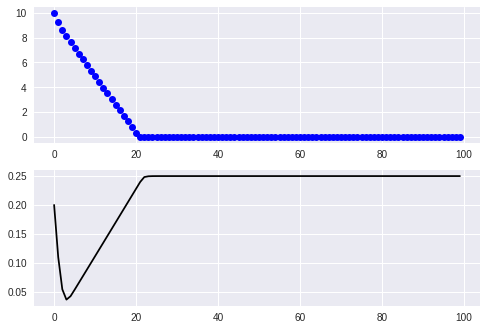

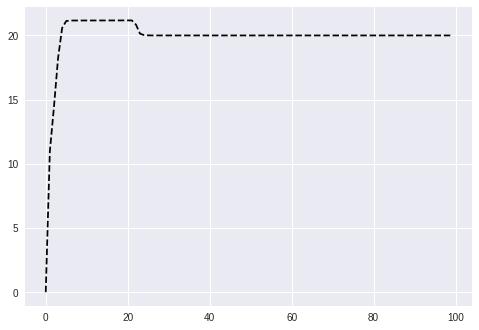

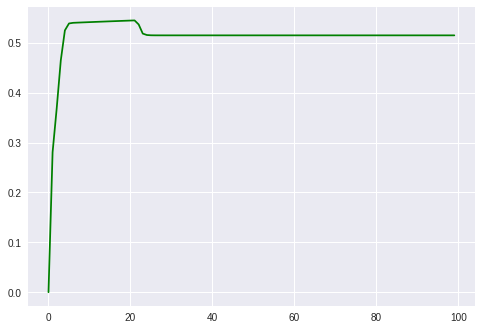

('sum(X_m) = ', 0.51493097145636801)
('np.sum(R_m*X_m) =', 20.0)


In [85]:
from __future__ import division

import numpy as np 
import math 
import matplotlib.pyplot as plt
# Input parameter: S, m
# Output parameter: X_m (vector of users of the service provider m)

# Input: 
S = np.array([5, 15, 25]) # Number of users at each MVNO 
Z_m_max =  np.array([20, 40, 100]) # Capacity limitation
m = 0;
z_m = Z_m_max[m]; # Backhaul capacity of the MVNO m 
s_m = S[m]; # Number of UEs at MVNO m
r_m = 20; 
rate_UE;
rate_m_min = 2; # minimum data rate requirement of UEs at MVNO m 

# def DD_method():

# algorithm parameter 

iter_m = 100; # Number of iterations for MVNO m 
X_m = np.zeros(iter_m) #  Matrix of resource allocation of all UE 
# at MVNO m following iteration iter_m

lambda_m = np.zeros(iter_m)

mu_m = np.zeros(iter_m)

sum_rate_m = np.zeros(iter_m)

sum_X_m = np.zeros(iter_m)

# Initiate variable: 
lambda_m[0] = 10 
mu_m[0] = 0.2
sum_rate_m[0] = 0; 

# Getting minimumfraction of RB of number of RBs of each MVNO
# Getting R_m (see in the paper or problem analysis):
X_m_min, R_m = cal_XR_min(r_m, m, S, rate_UE, rate_m_min)

theta_1 = 1
theta_3 = 0.01

# print(X_m_min, R_m)


# Starting algorithm of DD method

for i in range(1,iter_m):
  # Update vector X_m at all UE 
  
  #print ('lambda_m =', lambda_m[i-1])
  #print ('R_m*mu_m =', R_m*mu_m[i-1])
  
  X_m = 1/(lambda_m[i-1]+ R_m*mu_m[i-1])
  # print (X_m)
  #print (lambda_m[999-1])
  # Update vector lambda_m 
  lambda_m[i] = max(0,lambda_m[i-1] - theta_1*(1-np.sum(X_m)))
  
  # Update vecotr mu_m 
  mu_m[i] = max(0,mu_m[i-1] - theta_3*(z_m - np.sum(R_m*X_m)))
  # print (R_m*X_m, X_m)
  
  # Update total rate of MVNO m
  sum_rate_m[i] = np.sum(R_m*X_m)
  sum_X_m[i] = np.sum(X_m)
  
t1 = np.arange(iter_m)

# print(lambda_m)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, lambda_m, 'bo')

plt.subplot(212)
plt.plot(t1, mu_m, 'k')
plt.show()

plt.figure(2)
plt.plot(t1, sum_rate_m, '--k')
plt.show()

plt.figure(3)
plt.plot(t1, sum_X_m, '-g')

plt.show()
print ('sum(X_m) = ', np.sum(X_m))

print ('np.sum(R_m*X_m) =', np.sum(R_m*X_m))


  

In [71]:
# yy = np.sum(X_m)
# n = max(0,yy)
# print(n)

z_m

100

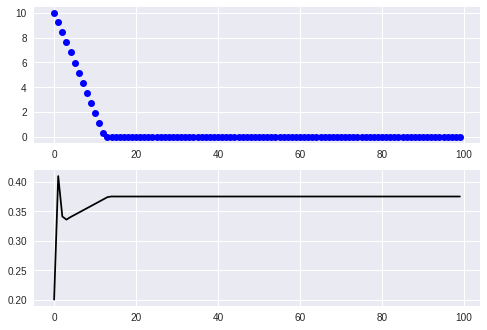

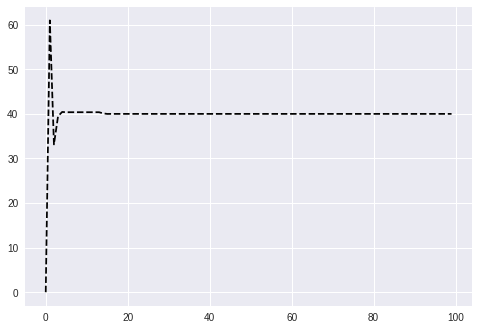

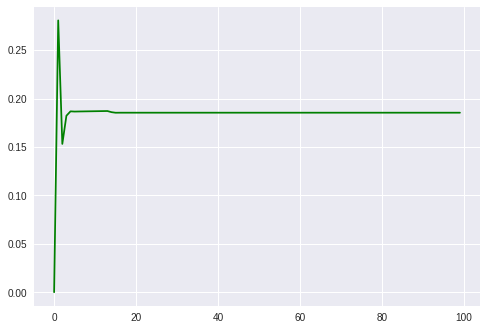

('sum(X_m) = ', 0.18535917285825682)
('np.sum(R_m*X_m) =', 40.0)
(0.18535917285825682, 40.0)


In [19]:
from __future__ import division

import numpy as np 
import math 
import matplotlib.pyplot as plt
def DD_method(S,Z_m_max, m, r_m, rate_UE, rate_m_min):
  # Input parameter: S, m
  # Input: 
  # S = np.array([5, 15, 25]) # Number of users at each MVNO 
  # Z_m_max =  np.array([20, 40, 100]) # Capacity limitation
  # m = 0;
  # r_m = 20; 
  # rate_UE;
  # rate_m_min = 2; # minimum data rate requirement of UEs at MVNO m 
  
  # Output parameter: X_m (vector of users of the service provider m)
  
  # Starting function 
  z_m = Z_m_max[m]; # Backhaul capacity of the MVNO m 
  s_m = S[m]; # Number of UEs at MVNO m
  
  # algorithm parameter 

  iter_m = 100; # Number of iterations for MVNO m 
  X_m = np.zeros(iter_m) #  Matrix of resource allocation of all UE 
  # at MVNO m following iteration iter_m

  lambda_m = np.zeros(iter_m)

  mu_m = np.zeros(iter_m)

  sum_rate_m = np.zeros(iter_m)

  sum_X_m = np.zeros(iter_m)

  # Initiate variable: 
  lambda_m[0] = 10 
  mu_m[0] = 0.2
  sum_rate_m[0] = 0; 

  # Getting minimumfraction of RB of number of RBs of each MVNO
  # Getting R_m (see in the paper or problem analysis):
  X_m_min, R_m = cal_XR_min(r_m, m, S, rate_UE, rate_m_min)

  theta_1 = 1
  theta_3 = 0.01

  # print(X_m_min, R_m)
  # Starting algorithm of DD method

  for i in range(1,iter_m):
    # Update vector X_m at all UE 

    #print ('lambda_m =', lambda_m[i-1])
    #print ('R_m*mu_m =', R_m*mu_m[i-1])

    X_m = 1/(lambda_m[i-1]+ R_m*mu_m[i-1])
    # print (X_m)
    #print (lambda_m[999-1])
    # Update vector lambda_m 
    lambda_m[i] = max(0,lambda_m[i-1] - theta_1*(1-np.sum(X_m)))

    # Update vecotr mu_m 
    mu_m[i] = max(0,mu_m[i-1] - theta_3*(z_m - np.sum(R_m*X_m)))
    # print (R_m*X_m, X_m)

    # Update total rate of MVNO m
    sum_rate_m[i] = np.sum(R_m*X_m)
    sum_X_m[i] = np.sum(X_m)

  # t1 = np.arange(iter_m)

  # print(lambda_m)

  #   plt.figure(1)
  #   plt.subplot(211)
  #   plt.plot(t1, lambda_m, 'bo')

  #   plt.subplot(212)
  #   plt.plot(t1, mu_m, 'k')
  #   plt.show()

  #   plt.figure(2)
  #   plt.plot(t1, sum_rate_m, '--k')
  #   plt.show()

  #   plt.figure(3)
  #   plt.plot(t1, sum_X_m, '-g')

  plt.show()
  # print ('sum(X_m) = ', np.sum(X_m))

  # print ('np.sum(R_m*X_m) =', np.sum(R_m*X_m))
  
  return (np.sum(X_m),np.sum(R_m*X_m)) 


# Input: 
S = np.array([5, 15, 25]) # Number of users at each MVNO 
Z_m_max =  np.array([20, 40, 100]) # Capacity limitation
m = 1;
# z_m = Z_m_max[m]; # Backhaul capacity of the MVNO m 
# s_m = S[m]; # Number of UEs at MVNO m
r_m =100; 
rate_UE;
rate_m_min = 2; # minimum data rate requirement of UEs at MVNO m 

sum_X_m, sum_rate_m = DD_method(S,Z_m_max, m, r_m, rate_UE, rate_m_min)

print (sum_X_m, sum_rate_m)



  

In [34]:
X_m_min = np.zeros(5) 
  
type(X_m_min)

rate_UE

array([[ 2.37627176],
       [ 1.8346054 ],
       [ 1.76096907],
       [ 1.83288357],
       [ 2.01900412],
       [ 1.96919146],
       [ 2.25755176],
       [ 2.66952472],
       [ 2.15585411],
       [ 1.8752943 ],
       [ 3.20385431],
       [ 3.65715285],
       [ 1.84815396],
       [ 2.35850727],
       [ 1.89917623],
       [ 1.87393659],
       [ 1.74479462],
       [ 2.20233074],
       [ 2.26212941],
       [ 1.82345416],
       [ 1.85242084],
       [ 1.9379803 ],
       [ 1.82051304],
       [ 1.94666795],
       [ 1.73076228],
       [ 2.30053786],
       [ 1.8713045 ],
       [ 1.73507537],
       [ 2.29974483],
       [ 1.97305636],
       [ 2.25132171],
       [ 2.12535674],
       [ 3.10852845],
       [ 3.67516883],
       [ 1.855856  ],
       [ 2.13574826],
       [ 1.96324047],
       [ 1.87006161],
       [ 2.17810361],
       [ 2.248448  ],
       [ 2.66884719],
       [ 1.83203091],
       [ 1.80599656],
       [ 1.87427138],
       [ 1.77924786]])

#### Main function

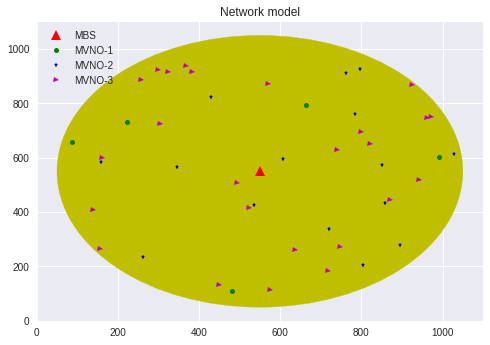

In [14]:
from __future__ import division
import numpy as np
import math 
import matplotlib.pyplot as plt

np.random.seed(11)

'''Module design'''




"""Main function"""

# Initializate network model 

I = 1; # Number of InP 
M = 3; # number of MVNO
S = np.array([5, 15, 25]) # Number of users at each MVNO 

# Getting network model (using class) 

# Number of MBS 
n_MBS = I; 
n_UE  = sum(S);
radius_MBS = 500; # m
bandwidth = 20; # Mhz
bw = 0.18 # MHz, bandwidth of each RB
power_MBS = 43 #dBm

Z_m_max =  np.array([20, 40, 100])

# Calculate noise 
Noise = 10**(calculateNoise(bandwidth)/10)# ~~ -100dBW
Noise = 10**(-11)# 
# Noise ~ 10**(-14); # Wats
# print(Noise)

# network_model.update(n_MBS,n_UE)
# H = network_model.channel_gain();
# P = network_model.power_downlink();

# Create network topology and display

# Getting Coors of BSs and UEs
(Coor_BS,Coor_UE, distance_BS_to_UE) = create_system(radius_MBS, n_UE)    

# plot network model
display_network_model(Coor_BS, Coor_UE, M, S,radius_MBS) 


# compute receivedSINRatUE 2D matrix 
rate_UE = np.zeros(shape=(n_UE,n_MBS)) # Matrix to update penalty to MVNO

for i in range(n_UE):
  for j in range(n_MBS):
    # SINR_Rx[i][j] = 10*math.log10(10**(calculateReceivedPower(power_MBS, distance_BS_to_UE[i][j])/10)/Noise)
    rate_UE[i][j] = 0.18*np.log2(1+10**(calculateReceivedPower(power_MBS, distance_BS_to_UE[i][j])/10)/Noise)

# print(rate_UE)



iter = 1 # Number of Interations 

Q = np.zeros(shape=(M,iter)) # Matrix to update penalty to MVNO

B = np.zeros(shape=(M,iter)) # Matrix to update biding value to InP

BETA = np.zeros(shape=(I,iter)) # Matrix to update biding value to InP

RATE = np.zeros(shape=(M,iter)) # Sum data rate matrix of MVNOs



# Stage I: Resource Competition Game

for i in range(1,iter): 
  print (i)
  # Step 1: Updating penalty value to MNVO --> Q matrix 
  
  
  # Step 2: Updating bidding value to InP --> B
  


  # Step 3: Broadcast virtual price (how much for each resource block)
  
  
  
  # Step 4: InP calculates number of RBs to allocate to each MVNO according to 
  # bidding value 
   
  
  # Step 5: Updating resource allocation at each MVNO 
  
  


# Stage II: Output display

# 0. Network model


# 1. Data rate of each MVNO following time 

# 2. 
  
  

In [0]:
distance_BS_to_UE

#### Main Function Full 

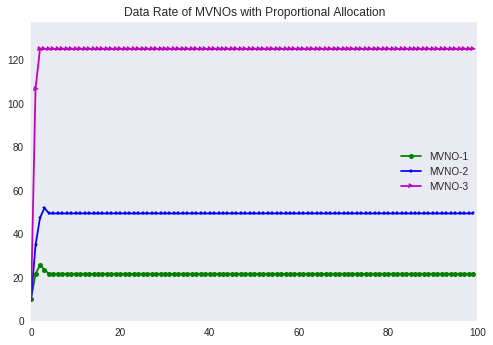

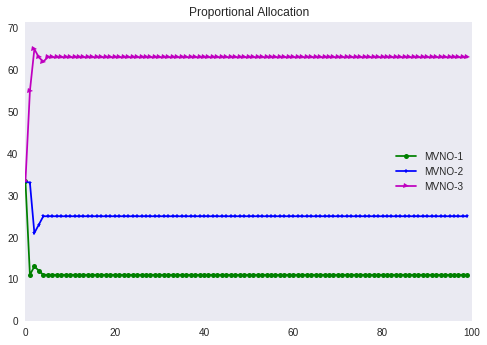

In [32]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import math


def clear_all():
    """Clears all the variables from the workspace of the spyder application."""
    gl = globals().copy()
    for var in gl:
        if var[0] == '_': continue
        if 'func' in str(globals()[var]): continue
        if 'module' in str(globals()[var]): continue

        del globals()[var]

clear_all()
np.random.seed(11)

'''Functions'''


def penalty_to_mvno(beta_local, r_m_local, R_local, q_m_old, b_local):
    # Compute penalty value for each MVNO m
    # input:
    # beta: virtual price of InP
    # r_m: allocated RBs to MVNO m
    # R: total number of RBs of InP
    # q_m_old: penalty parameter at previous time slot.
    # b: bidding value vector getting from MVNO
    q_m_new = 1 / beta_local * (1 - r_m_local / R_local ) * q_m_old / (R_local - r_m_local) * np.sum(b_local)
    return q_m_new

    # # testing:
    # beta = 5;
    # r = 4;
    # R = 20;
    # b = np.array([3,4,5])
    # q_old = 3.4;
    #
    # q_new = penalty_to_MVNO(beta,r,R,q_old,b)
    # print(q_new)


def virtual_price(b_local, R_local):
    # b: bidding value vector getting from MVNO
    # R: total number of RBs of InP
    # beta: virtual price of InP
    # function of virtual price
    # print(sum(b), R)
    beta_local = np.sum(b_local) / R_local
    # print(beta)
    return beta_local
    # b1 = np.array([1, 2,3, 4, 5])
    # R1 = 20 ;

    # beta = virtual_price(b,R)
    # print(beta)


def bidding_value(RATE_m):
    # RATE_m: data rate vector of the MVNO m
    b_m = sum(RATE_m)
    return b_m


def cal_number_of_rbs(b_m, b, R):
    # Calcuating number RBs for each MVNO
    # b: bidding value vector getting from MVNO
    # R: total number of RBs of InP
    # b_m: bidding value of MVNO m
    r_m = b_m / (np.sum(b)) * R  # Question: Do we need to round this number to an Integer value ???
    # This one will be considered after finishing ...
    return r_m

    # # Test
    # b_m = 4;
    # b = np.array([4,5,10]);
    # R = 20;

    # r_m = cal_number_of_RBs(b_m, b,R)

    # print(r_m)


'''Module design'''


def create_system(rad, num, dist_min=20):
    """This function to create random UEs inside one BS
    *Input:
    - rad: radius of the BS
    - num: number of UEs
    - dist_min: minimum distance between BS and UEs
    * Output:
    - Coor_UE, Coor_BS, distance from BS to UEs

    """
    # Testing:
    #   rad = 100
    #   num = 20

    # Update coordinator of BS
    x_BS = rad + 50
    y_BS = rad + 50
    Coor_BS = np.array([[x_BS, y_BS]])
    Coor_UE = np.zeros(shape=(num, 2))
    exit = False;

    while (exit == False):
        t = np.random.uniform(0.0, 2.0 * np.pi, num)
        r = rad * np.sqrt(np.random.uniform(0.0, 1.0, num))
        x = Coor_BS[0][0] + r * np.cos(t)
        y = Coor_BS[0][1] + r * np.sin(t)

        # Update coordinator of UEs
        Coor_UE[:, 0] = x;
        Coor_UE[:, 1] = y;

        # calculate distance UE and BS
        distance = distanceUEtoMBS(Coor_BS, Coor_UE)

        # Satisfy condition?
        if (min(distance[:, 0]) < dist_min):
            exit = False
        else:
            exit = True

    return Coor_BS, Coor_UE, distance

    # Coor_BS, Coor_UE = create_system(200, 20)


def display_network_model(Coor_BS, Coor_UE, M, S, rad):
    #   """
    #   * Input:

    #   - Coor_BS: coor of BSs
    #   - Coor_UE: coor of UEs
    #   - M: number of MVNO
    #   - S = users vector: number of UEs at each MVNO
    #   - rad: radius of MBS

    #   * Output:
    #   - Display network information

    #   """

    # Plot MBS location
    circle1 = plt.Circle((Coor_BS[0][0], Coor_BS[0][1]), 500, color='y')
    fig, ax = plt.subplots()  # note we must use plt.subplots, not plt.subplot
    # (or if you have an existing figure)
    # fig = plt.gcf()
    # ax = fig.gca()
    ax.add_artist(circle1)
    plt.figure(1)
    plt.plot(Coor_BS[0][0], Coor_BS[0][1], "r^", ms=10, label='MBS')

    # Plot UEs of each MVNO
    for m in range(M):
        if (m == 0):
            plt.plot(Coor_UE[:S[m], 0], Coor_UE[:S[m], 1], "go", ms=5, label='MVNO-1')
        elif (m == 1):
            plt.plot(Coor_UE[sum(S[:m]):(sum(S[:m]) + S[m]), 0], Coor_UE[sum(S[:m]):(sum(S[:m]) + S[m]), 1], "b*", ms=5,
                     label='MVNO-2')
        elif (m == 2):
            plt.plot(Coor_UE[sum(S[:m]):(sum(S[:m]) + S[m]), 0], Coor_UE[sum(S[:m]):(sum(S[:m]) + S[m]), 1], "m>", ms=5,
                     label='MVNO-3')
        else:
            ValueError('M must be less than 3!')
    plt.axis([0, (2 * rad + rad / 5), 0, (2 * rad + rad / 5)])
    plt.title('Network model')
    plt.legend()
    plt.show()

def plot_RATE(rate, M, iter):
    plt.figure(2)
    t = range(iter)
    y_max = rate.max() + rate.max()/10
    for m in range(M):
        if (m == 0):
            plt.plot(t, rate[0,:], "-go", ms=5, label='MVNO-1')
        elif (m == 1):
            plt.plot(t, rate[1,:], "-b*", ms=5,
                     label='MVNO-2')
        elif (m == 2):
            plt.plot(t, rate[2,:], "-m>", ms=5,
                     label='MVNO-3')
        else:
            ValueError('M must be less than 3!')
    plt.axis([0, iter, 0, y_max])
    plt.title('Data Rate of MVNOs with Proportional Allocation')
    plt.legend()
    plt.grid()
    plt.show()

def plot_RA(rate, M, iter):
    plt.figure(3)
    t = range(iter)
    y_max = rate.max() + rate.max()/10
    for m in range(M):
        if (m == 0):
            plt.plot(t, rate[0,:], "-go", ms=5, label='MVNO-1')
        elif (m == 1):
            plt.plot(t, rate[1,:], "-b*", ms=5,
                     label='MVNO-2')
        elif (m == 2):
            plt.plot(t, rate[2,:], "-m>", ms=5,
                     label='MVNO-3')
        else:
            ValueError('M must be less than 3!')
    plt.axis([0, iter, 0, y_max])
    plt.title('Proportional Allocation')
    plt.legend()
    plt.grid()
    plt.show()

def distanceUEtoMBS(cBS, cUE):
    """
    Input:

    - cUE: coordinators of UEs
    - cBS: coordinators of BSs

    * Ouput:
    - array 2D
    - distance between UEs and cBSs
    """

    # Getting number of UEs from cUE
    nUE = cUE.shape[0]
    # Getting number of BSs from cBS
    nBS = cBS.shape[0]
    distance = np.zeros(shape=(nUE, nBS))
    for ue in range(nUE):
        for bs in range(nBS):
            # print('ue=',ue,'bs=',bs)
            distance[ue][bs] = math.sqrt((cUE[ue][0] - cBS[bs][0]) ** 2
                                         + (cUE[ue][1] - cBS[bs][1]) ** 2)
    return distance


def calculateNoise(self, bandwidth=20):
    k = 1.3806488 * math.pow(10, -23)
    T = 293.0
    BW = bandwidth * 1000 * 1000
    N = 10 * math.log10(k * T) + 10 * np.log10(BW)  # dB
    return N


def calculateReceivedPower(pSend, distance):
    R = distance
    lambda_val = 0.142758313333
    a = 4.0
    b = 0.0065
    c = 17.1
    d = 10.8
    s = 15.8

    ht = 40
    hr = 1.5
    f = 1.9
    gamma = a - b * ht + c / ht
    Xf = 6 * np.log10(f / 2)
    Xh = -d * np.log10(hr / 2)

    R0 = 100.0
    R0p = R0 * pow(10.0, -((Xf + Xh) / (10 * gamma)))

    if (R > R0p):
        alpha = 20 * np.log10((4 * np.pi * R0p) / lambda_val)
        PL = alpha + 10 * gamma * np.log10(R / R0) + Xf + Xh + s
    else:
        PL = 20 * np.log10((4 * np.pi * R) / lambda_val) + s

    pRec = pSend - PL
    if (pRec > pSend):
        pRec = pSend
    return pRec


def cal_XR_min(r_m, m, S, rate_UE, rate_m_min):
    # This function to calculate minimum the number of RBs for each UE of the MVNO m.
    # Input:
    # rate_m_min: minimum data rate requirement for UEs at MVNO m
    # r_m  : total number of RBs for MVNO m
    # S: Number of UEs of MVNO m
    # rate_UE: Data rate of the UEs with one RB
    # m: index of the MVNO
    # Output:
    # X_m_min: minimum fraction of number of RBs of MVNO m
    # R_m: maximum data rate of users in MVNO m with r_m to the MVNO m
    s_m = S[m];
    if m == 0:
        # print(rate_UE[0:s_m][0])
        X_m_min = rate_m_min / (r_m * rate_UE[0:s_m, 0]);
        R_m = r_m * rate_UE[0:s_m, 0]
    else:
        X_m_min = rate_m_min / (r_m * rate_UE[sum(S[:m]):(sum(S[:m]) + S[m]), 0]);
        R_m = r_m * rate_UE[sum(S[:m]):(sum(S[:m]) + S[m]), 0]

    return X_m_min, R_m


    # X_m_min = cal_R_min(20, 0, S, rate_UE, 2)
    # # print(S)
    # print (X_m_min)


# Test: OK

def DD_method(S, Z_m_max, m, r_m, rate_UE, rate_m_min):
    # Input parameter: S, m
    # Input:
    # S = np.array([5, 15, 25]) # Number of users at each MVNO
    # Z_m_max =  np.array([20, 40, 100]) # Capacity limitation
    # m = 0;
    # r_m = 20;
    # rate_UE;
    # rate_m_min = 2; # minimum data rate requirement of UEs at MVNO m

    # Output parameter: X_m (vector of users of the service provider m)
    # vector data rate of the MVNO m R_m * X_mR_m*X_m

    # Starting function
    z_m = Z_m_max[m];  # Backhaul capacity of the MVNO m
    s_m = S[m];  # Number of UEs at MVNO m

    # algorithm parameter

    iter_m = 100;  # Number of iterations for MVNO m
    X_m = np.zeros(iter_m)  # Matrix of resource allocation of all UE
    # at MVNO m following iteration iter_m

    lambda_m = np.zeros(iter_m)

    mu_m = np.zeros(iter_m)

    sum_rate_m = np.zeros(iter_m)

    sum_X_m = np.zeros(iter_m)

    # Initiate variable:
    lambda_m[0] = 7
    mu_m[0] = 0.2
    sum_rate_m[0] = 0;

    # Getting minimumfraction of RB of number of RBs of each MVNO
    # Getting R_m (see in the paper or problem analysis):
    X_m_min, R_m = cal_XR_min(r_m, m, S, rate_UE, rate_m_min)

    theta_1 = 1
    theta_3 = 0.01

    # print(X_m_min, R_m)
    # Starting algorithm of DD method

    for i in range(1, iter_m):
        # Update vector X_m at all UE

        # print ('lambda_m =', lambda_m[i-1])
        # print ('R_m*mu_m =', R_m*mu_m[i-1])

        X_m = 1 / (lambda_m[i - 1] + R_m * mu_m[i - 1])
        # print (X_m)
        # print (lambda_m[999-1])
        # Update vector lambda_m
        lambda_m[i] = max(0, lambda_m[i - 1] - theta_1 * (1 - np.sum(X_m)))

        # Update vecotr mu_m
        mu_m[i] = max(0, mu_m[i - 1] - theta_3 * (z_m - np.sum(R_m * X_m)))
        # print (R_m*X_m, X_m)

        # Update total rate of MVNO m
        sum_rate_m[i] = np.sum(R_m * X_m)
        sum_X_m[i] = np.sum(X_m)

    # t1 = np.arange(iter_m)

    # print(lambda_m)

    #   plt.figure(1)
    #   plt.subplot(211)
    #   plt.plot(t1, lambda_m, 'bo')

    #   plt.subplot(212)
    #   plt.plot(t1, mu_m, 'k')
    #   plt.show()

    #   plt.figure(2)
    #   plt.plot(t1, sum_rate_m, '--k')
    #   plt.show()

    #   plt.figure(3)
    #   plt.plot(t1, sum_X_m, '-g')

    # plt.show()
    # print ('sum(X_m) = ', np.sum(X_m))

    # print ('np.sum(R_m*X_m) =', np.sum(R_m*X_m))

    return np.sum(X_m), np.sum(R_m * X_m), R_m*X_m

# # Input:
# S = np.array([5, 15, 25]) # Number of users at each MVNO
# Z_m_max =  np.array([20, 40, 100]) # Capacity limitation
# m = 1;
# # z_m = Z_m_max[m]; # Backhaul capacity of the MVNO m
# # s_m = S[m]; # Number of UEs at MVNO m
# r_m =100;
# rate_UE;
# rate_m_min = 2; # minimum data rate requirement of UEs at MVNO m

# sum_X_m, sum_rate_m = DD_method(S,Z_m_max, m, r_m, rate_UE, rate_m_min)

# print (sum_X_m, sum_rate_m)


"""Main function"""

# Initializate network model

I = 1;  # Number of InP
M = 3;  # number of MVNO
S = np.array([5, 15, 25])  # Number of users at each MVNO

# Getting network model (using class)

# Number of MBS
n_MBS = I;
n_UE = sum(S);
radius_MBS = 500;  # m
bandwidth = 20;  # Mhz
bw = 0.18  # MHz, bandwidth of each RB
power_MBS = 43  # dBm
n_RB = 100 # Number of RBs

Z_m_max = np.array([40, 60, 80])
rate_m_min = 0.5
# Calculate noise
Noise = 10 ** (calculateNoise(bandwidth) / 10)  # ~~ -100dBW
Noise = 10 ** (-11)  #
# Noise ~ 10**(-14); # Wats
# print(Noise)

# network_model.update(n_MBS,n_UE)
# H = network_model.channel_gain();
# P = network_model.power_downlink();

# Create network topology and display

# Getting Coors of BSs and UEs
(Coor_BS, Coor_UE, distance_BS_to_UE) = create_system(radius_MBS, n_UE)

# compute receivedSINRatUE 2D matrix
rate_UE = np.zeros(shape=(n_UE, n_MBS))  # Matrix to update penalty to MVNO

for i in range(n_UE):
    for j in range(n_MBS):
        # SINR_Rx[i][j] = 10*math.log10(10**(calculateReceivedPower(power_MBS, distance_BS_to_UE[i][j])/10)/Noise)
        rate_UE[i][j] = 0.18 * np.log2(
            1 + 10 ** (calculateReceivedPower(power_MBS, distance_BS_to_UE[i][j]) / 10) / Noise)

# print(rate_UE)

iter = 100# Number of Interations

Q = np.zeros(shape=(M, iter))  # Matrix to update penalty to MVNO
Q[:, 0] = 0.1

B = np.zeros(shape=(M, iter))  # Matrix to update biding value to InP
B[:, 0] = 0.1

BETA = np.zeros(shape=(I, iter))  # Matrix to update biding value to InP
BETA[:, 0] = 0.1

RATE = np.zeros(shape=(M, iter))  # Sum data rate matrix of MVNOs
RATE[:, 0] = 10 # s


X_M = np.zeros(shape=(M, iter))  # Sum data rate matrix of MVNOs
X_M[:, 0] = 0.8 # Mbps

RM = np.zeros(shape=(M, iter))  # Number of RBs allocate to MVNOs
RM[:, 0] = n_RB/M

RV = np.zeros(shape=(np.sum(S), iter))  # Vector data rate of users in all MVNOs
RV[:, 0] = 0.5 # Mbps

# Stage I: Resource Competition Game


for i in range(1, iter):
    # print (i)

    # PHASE I

    # Step 1: Updating penalty value to MNVO --> Q matrix
        # Using function: penalty_to_mvno(beta, r_m, R, q_m_old, b)
    for m in range(M):
        Q[m][i] = penalty_to_mvno(BETA[0][i-1], RM[m][i-1], n_RB, Q[m][i-1], B[:, i-1])
    #print('Q[:, i] =', Q[:, i])

    # Step 2: Updating bidding value to InP --> B
    # Using function:
    for m in range(M):

        s_m = S[m]
        if m == 0:
            # print(rate_UE[0:s_m][0])
            RV_m = RV[0:s_m, i - 1]
        else:
            RV_m = RV[sum(S[:m]):(sum(S[:m]) + S[m]), i - 1]

        B[m][i] = bidding_value(RV_m)
    #print('B[:, i] =', B[:, i])

    # Step 3: Broadcast virtual price (how much for each resource block)
    # using virtual_price(b, R)
    BETA[0][i] = virtual_price(B[:, i], n_RB)

    #print('BETA[0][i] =', BETA[0][i] )

    # Step 4: InP calculates number of RBs to allocate to each MVNO according to
    # bidding value
    # Using function: cal_number_of_rbs(b_m, b, R)
    for m in range(M):
        RM[m][i] = cal_number_of_rbs(B[m][i], B[:, i], n_RB)
        RM[m][i] = int(RM[m][i])
    #print('RM[:, i] =', RM[:, i])

    # PHASE II
    # Step 5: Updating resource allocation at each MVNO
    for m in range(M):
        # np.sum(X_m), np.sum(R_m * X_m), R_m*X_m = DD_method(S, Z_m_max, m, r_m, rate_UE, rate_m_min)
        X_M_A, RATE_A, V_m_A = DD_method(S, Z_m_max, m, RM[m][i], rate_UE, rate_m_min)
        s_m = S[m]
        if m == 0:
            # print(rate_UE[0:s_m][0])
            RV[0:s_m, i] = V_m_A
        else:
            RV[sum(S[:m]):(sum(S[:m]) + S[m]), i] = V_m_A
        X_M[m][i] = X_M_A
        RATE[m][i] = RATE_A

    #print('RV[:, i] =', RV[:, i])
    #print('X_M[:, i] =', X_M[:, i])
    #print('RATE[:, i] =', RATE[:, i])




# Stage II: Output display

# 0. Network model

# plot network model
# display_network_model(Coor_BS, Coor_UE, M, S, radius_MBS)

# 1. Data rate of each MVNO following time

plot_RATE(RATE, M, iter)


plot_RA(RM, M, iter)

# 2. Plot proportional allocation:



In [104]:
Coor_UE.shape

(45, 2)

# Network analysis and algorithm design

## ADMM design

- Utility function: 

- O1: $v_m(r_m) = \sum_{s=1}^{S_m}\log(x_s^mr_mw\log_2(1+\frac{p_sh_s}{N_0}))$

- Constraints:

    - C1: $ x_s^m = [0,1]$, $\forall m \in \mathcal{M}$,
    - C2: $ \sum_{s=1}^{S_m} x_s^m \leq 1$, $\forall m \in \mathcal{M}$
    - C3: $ x_s^mr_mw\log_2(1+\frac{p_sh_s}{N_0}) \ge \rho_s^{\mathsf{min}}$, $\forall s \in \mathcal{S}$, $\forall m \in \mathcal{M}$
    - C4: $ \sum_{s=1}^{S_m}x_s^mr_mw\log_2(1+\frac{p_sh_s}{N_0}) \leq Z_m^{\mathsf{max}}$, $\forall m \in \mathcal{M}$

- $L_{\rho} (x,\lambda) = \sum_{s=1}^{S_m}\log(x_s^mr_mw\log_2(1+\frac{p_sh_s}{N_0})) + \sum_{m=1}^M \lambda_m(\sum_{s=1}^{S_m} x_s^m - 1) + \frac{\rho}{2} || \sum_{s=1}^{S_m} x_s^m -1 ||_2^2 $  


\begin{equation}
 				\begin{aligned} 
 				L(x_s^m,\lambda,\nu, \mu) = \log(x_s^mr_m\omega\log_2(1+ \frac{p_sh_s}{N_0})) - \lambda x_s^m - \mu \log(x_s^mr_m\omega\log_2(1+ \frac{p_sh_s}{N_0})) 
 				\end{aligned}
\end{equation}

Let $R_m = r_mωlog2(1+pshsN0)$ 

\begin{equation}
 				\begin{aligned} 
 				L(x_s^m,\lambda,\nu, \mu) = \log(x_s^mR_m) - \lambda x_s^m - \mu x_s^mR_m 
 				\end{aligned}
\end{equation}


Take derivative: 

$\frac{\partial L(x_s^m, \lambda, \nu, \mu)}{\partial x_s^m} = \frac{1}{x_s^m} - \lambda - \mu R_m $

Taking $\frac{\partial L(x_s^m, \lambda, \nu, \mu)}{\partial x_s^m} = 0 $  following $x_s$ variable, we have: 

$x_s^m = \bigg[ \frac{1}{\lambda + \mu R_m }  \bigg]_{x_s^{\mathsf{min}}}^{x_s^{\mathsf{max}}} $



When Lagrangian Dual function $(12)$ is not differential, subgradient method can be applied and update the Lagrangian Multipliers according to the following, 

 \begin{align}
 \lambda_s^{(i+1)} &= \bigg[\lambda_s^i - \theta_1^{(i)}\bigg(1- \sum_{s=1}^{S_m}x_s^m\bigg)\bigg], \ \ \ \ \ \ \ \ \ \forall s.\\
 \mu_s^{(i+1)} &= \bigg[\mu_s^i - \theta_3^{(i)}\bigg( Z_m^{max} -\sum_{s=1}^{S_m}x_s^m r_m\omega \log_2(1+\frac{p_s h_s}{N_0})\bigg)\bigg], \forall s.
 \end{align} 
where $\theta_1^i, \theta_2^i $,and $\theta_3^i$ are step sizes of each iteration $i (i \in \{1, 2, 3, ... , I_{max}\})$, $I_{max}$ is the maximum number of iterations of algorithm, and the step sizes can be formulated. 


## Dual decomposition design

- Utility function: 

- O1: $v_m(r_m) = \log(\sum_{s=1}^{S_m}\log(x_s^mr_mw\log_2(1+\frac{p_sh_s}{N_0})))$

- Constraints:

    - C1: $ x_s^m = [0,1]$, $\forall m \in \mathcal{M}$,
    - C2: $ \sum_{s=1}^{S_m} x_s^m \leq 1$, $\forall m \in \mathcal{M}$
    - C3: $ x_s^mr_mw\log_2(1+\frac{p_sh_s}{N_0}) \ge \rho_s^{\mathsf{min}}$, $\forall s \in \mathcal{S}$, $\forall m \in \mathcal{M}$
    - C4: $ \sum_{s=1}^{S_m}x_s^mr_mw\log_2(1+\frac{p_sh_s}{N_0}) \leq Z_m^{\mathsf{max}}$, $\forall m \in \mathcal{M}$


In this subsection, MVNO's RBs allocation to its subscribers (sum rate maximizing) optimization in $(12)$ is solved by using Lagrangian Dual Decomposition method subject to constaints C1, C2, and C4. The Lagrangian function can be expressed as:     
\begin{equation}
 				\begin{aligned} 
 				L(x_s^m,\lambda,\nu, \mu) ={} &\sum_{s=1}^{S_m} \log(x_s^mr_m\omega\log_2(1+ \frac{p_sh_s}{N_0})) \\
 				& + \lambda \bigg(1-\sum_{s=1}^{S_m}x_s^m\bigg)- \sum_{s=1}^{S_m}\nu_s\bigg(\rho_s^{min}\\
 				&-\log(x_s^mr_m\omega\log_2(1+ \frac{p_sh_s}{N_0}))\bigg)\\
 				& - \mu \bigg(\sum_{s=1}^{S_m} \log(x_s^mr_m\omega\log_2(1+ \frac{p_sh_s}{N_0})) \\
 				&-Z_m^{max}\bigg)
 				\end{aligned}
\end{equation}




where $\lambda, \nu, \mu $ are the Lagrangian multipliers for constraints in $  (14), (15), (16)$. Karush-Kuhn-Tucker (KKT) conditions absorbed the boundary condition in $(13)$. So, The Lagrangian dual function can be formulated as: 
$
 	\begin{equation}
 			D(\lambda,\mu) = \max_{x_s^m} L(x_s^m,\lambda, \nu, \mu)
    \end{equation}$
Then the dual problem can be expressed as:
 $
 	\begin{align}
                 			& \max_{\lambda, \nu, \mu} 
                 			\begin{aligned}[t]
                 			& D(\lambda, \nu, \mu)
                 			\end{aligned} \\
                 			&\text{s.t.} \notag \\
                 			& \lambda, \nu, \mu \geq 0.   
    \end{align}  $
According to KKT conditions, the solution of the RBs scheduling problem, denoted by ${x_s^m}$ can be obtained: 

 \begin{equation}
 \frac{\partial L(x_s^m, \lambda, \nu, \mu)}{\partial x_s^m} = \frac{1}{x_s^m} - \lambda_s + r_m\omega\log_2(1+ \frac{p_sh_s}{N_0})(\nu_s+\mu_s)
 \end{equation}  

\begin{equation}
    \frac{\partial L(x_s^m, \lambda, \nu, \mu)}{\partial x_s^m} =
\begin{cases}
    0,& \text{if } x_s^m\geq 1\\
    <0,              & \text{if} x_s^m=0.
\end{cases}
\end{equation} 
By setting $(21)$ equal to $0$, we can obtain the optimal solution of the MVNO's RBs allocation problem and it is as follows,

\begin{equation}
x_s^m = \bigg[\frac{1}{\lambda_s-r_m\omega\log_2(1+\frac{p_sh_s}{N_0})(\nu_s+\mu_s)}\bigg]^+,  \forall s.
\end{equation}

When Lagrangian Dual function $(12)$ is not differential, subgradient method can be applied and update the Lagrangian Multipliers according to the following, 

 \begin{align}
 \lambda_s^{(i+1)} &= \bigg[\lambda_s^i - \theta_1^{(i)}\bigg(1- \sum_{s=1}^{S_m}x_s^m\bigg)\bigg], \ \ \ \ \ \ \ \ \ \forall s.\\
 \nu_s^{(i+1)} &= \bigg[\nu_s^i - \theta_2^{(i)}\bigg(x_s^m r_m\omega \log_2(1+\frac{p_s h_s}{N_0})- \rho_s^{min}\bigg)\bigg], \forall s.\\
 \mu_s^{(i+1)} &= \bigg[\mu_s^i - \theta_3^{(i)}\bigg(\sum_{s=1}^{S_m}x_s^m r_m\omega \log_2(1+\frac{p_s h_s}{N_0})- Z_m^{max}\bigg)\bigg], \forall s.
 \end{align} 
where $\theta_1^i, \theta_2^i $,and $\theta_3^i$ are step sizes of each iteration $i (i \in \{1, 2, 3, ... , I_{max}\})$, $I_{max}$ is the maximum number of iterations of algorithm, and the step sizes can be formulated as: 

  	\begin{equation}
  			\theta_j^i = \frac{a}{\sqrt{i}} ,\  a>0 , \ j = \{1,2,3\} .
  	\end{equation}
Moreover, step sizes must satisfy the following conditions, 




# Others

In [24]:
import numpy as np
Q = np.zeros(shape=(2, 2)) 
Q[1][1] =2
print(Q)
x = Q[:,1]
print (x)

[[ 0.  0.]
 [ 0.  2.]]
[ 0.  2.]


In [30]:
n = 0.9
int(n)

0